# Communicate Data Findings - Loan Data from Prosper
## by Abha Ramchandani

## Investigation Overview

> The fact that we are investigating Loan data, the fisrt question that comes to my mind is 'how do I pay the least interest?'

> That led me to investigate all the factors/variables that affect the interest rate, represented by BorrowerAPR in the given data.

## Dataset Overview

> The loan dataset has been provided in a CSV file. It contains 113,937 records and 81 variables about each loan data, including loan amount, borrower rate (or interest rate), current loan status, etc. It also contains those listings which didn't transformed into a loan. There is also information on partially funded loans in the dataset.

## What factors influence the Interest Rates / BorrowerAPR?

> Let's review how the prosper rate and so the Borrower APR is influenced. Quite intuitively, ProsperScore (Alpha) is a valuable evaluation metric, also confirmed by our analysis.

> After having made some initial Univariate and Bivariate observations, we will look at how Term, ProsperRating, StatedMonthyIncome and LoanOriginalAmount and a combinations of these variables affect BorrowerAPR and each other.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df_copy = df.copy()
df_copy.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Features of interest
columns = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)']
df_copy = df_copy[columns]

# Data Wrangling - Remove loans with missing BorrowerAPR
df_copy = df_copy[~df_copy.BorrowerAPR.isna()]

# Data Wrangling - Remove loans with StatedMonthlyIncome > 30k, these are outliers
df_copy = df_copy[df_copy.StatedMonthlyIncome <= 30000]

# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['AA','A','B','C','D','E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rate_order)
df_copy['ProsperRating (Alpha)'] = df_copy['ProsperRating (Alpha)'].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Effect of ProsperRating and Term on BorrowerAPR & its relationships with LoanOriginalAmount and StatedMonthlyIncome


### BorrowerAPR vs Term and ProsperRating (Alpha)
> As ProsperRating gets better HR>AA, the BorrowerAPR decreases.

> Generally speaking, for ProsperRating HR>C, BorrowerAPR generally decreses with increase in length of loan Term. This reverses as we go from ProsperRating B>AA

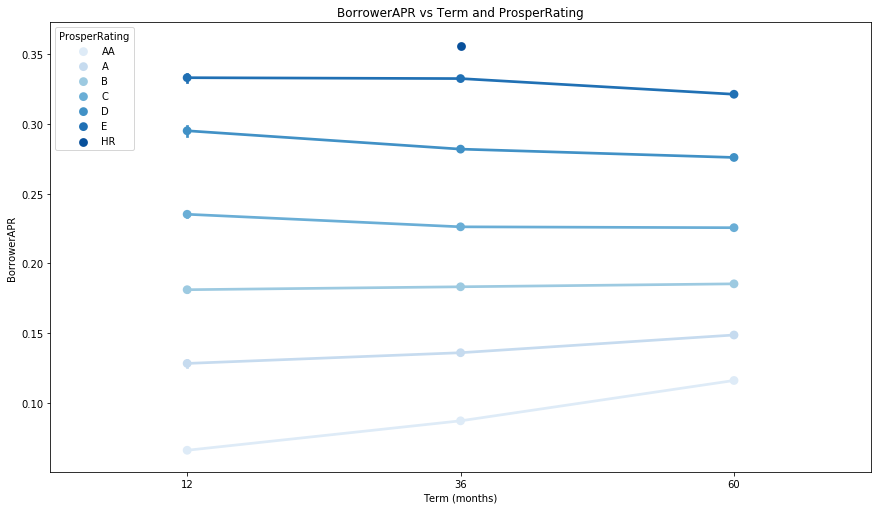

In [4]:
# Plot BorrowerAPR vs Term and ProsperRating (Alpha)
plt.figure(figsize = [14.70, 8.27])

ax = sb.pointplot(data = df_copy, x = 'Term', y = 'BorrowerAPR', hue = 'ProsperRating (Alpha)',
                   palette = 'Blues');
plt.legend(loc = 2, title = 'ProsperRating');
plt.xlabel('Term (months)');
plt.title('BorrowerAPR vs Term and ProsperRating', color = 'black');

### BorrowerAPR vs Term and LoanOriginalAmount

> 36-month Term has most number of loans, followed by 60-month and 12-month Terms.

> There are more loans for lower LoanOriginalAmount in all the terms.

> As LoanOriginalAmount increases BorrowerAPR decreases.

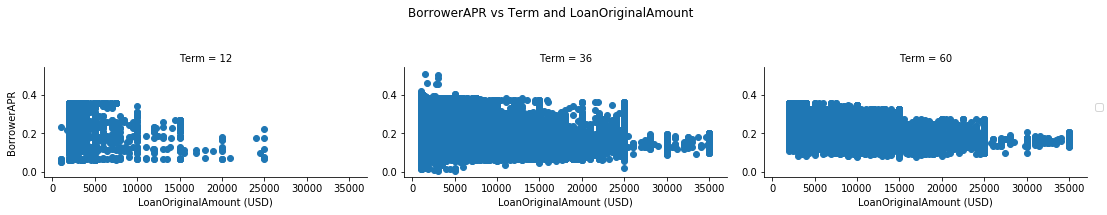

In [5]:
# Plot BorrowerAPR vs Term and LoanOriginalAmount
#plt.figure(figsize = [14.70, 8.27])
g = sb.FacetGrid(data = df_copy, size = 3, aspect = 1.7, col = 'Term')
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR').set_axis_labels("LoanOriginalAmount (USD)", "BorrowerAPR");
g.fig.suptitle('BorrowerAPR vs Term and LoanOriginalAmount', color = 'black');
plt.subplots_adjust(top = 0.7)
g.add_legend();

### BorrowerAPR vs Term and StatedMonthlyIncome

> Generally speaking, higher the StatedMonthlyIncome, lower the BorrowerAPR.

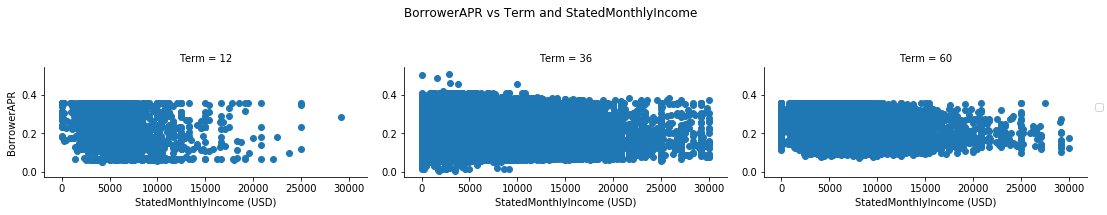

In [6]:
# Plot BorrowerAPR vs Term and StatedMonthlyIncome
#plt.figure(figsize = [14.70, 8.27])
g = sb.FacetGrid(data = df_copy, size = 3, aspect = 1.7, col = 'Term')
g.map(plt.scatter, 'StatedMonthlyIncome', 'BorrowerAPR').set_axis_labels("StatedMonthlyIncome (USD)", "BorrowerAPR");
plt.suptitle('BorrowerAPR vs Term and StatedMonthlyIncome', color = 'black');
plt.subplots_adjust(top = 0.7);
g.add_legend();

### PropsperRating vs. (LoanOriginalAmount, StatedMonthlyIncome and BorrowerAPR)

> Better ProsperRating means better BorrowerAPR

> Better ProsperRating means higher loan amounts are approved

> There is no significant relationship between StateMonthlyIncome and ProsperRating (Alpha). People in any income range can have good as well poor ProsperRating

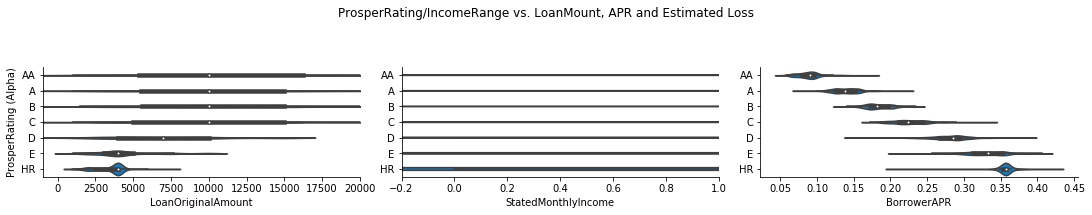

In [7]:
# Plot all PropsperRating vs. (LoanOriginalAmount, StatedMonthlyIncome and BorrowerAPR)
base_color = sb.color_palette()[0]
#plt.figure(figsize = [14.70, 8.27])

# Plot matrix: sample 7000 so that plots are clearer and they render faster
samples = np.random.choice(df_copy.shape[0], 7000, replace = False)
pairplot_sample = df_copy.iloc[samples,:]

# Plot
g = sb.PairGrid(data = pairplot_sample, 
                x_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome','BorrowerAPR'],
                y_vars = ['ProsperRating (Alpha)'], 
                size = 3, aspect = 1.7, dropna = True)

g.map(sb.violinplot,  color = base_color, saturation = 2);
g.axes[0,0].set_xlim(-1000,20000)
g.axes[0,1].set_xlim(-0.2,1)
g.fig.suptitle('ProsperRating/IncomeRange vs. LoanMount, APR and Estimated Loss', fontdict={'fontsize': 18}, color = 'black');
g.fig.subplots_adjust(top = 0.7)


for i in np.arange(g.axes.shape[0]):
    for j in np.arange(g.axes.shape[1]):
        g.axes[i,j].grid(False)

> Slide Type: Note

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 393888 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: n

> Note: Running above creates the slide deck, but HTML is not rendering. This is because I am using Udacity's workspace to run my code.